In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

In [54]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


In [55]:
df.shape

(973, 15)

In [56]:
df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [58]:
df['Age'].describe()

count    973.000000
mean      38.683453
std       12.180928
min       18.000000
25%       28.000000
50%       40.000000
75%       49.000000
max       59.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

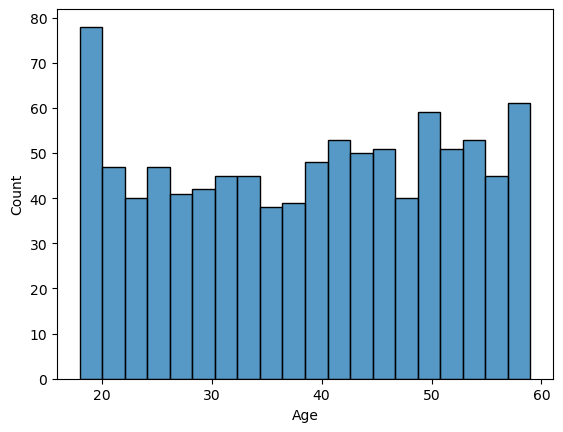

In [59]:
sns.histplot(df['Age'], bins=20)

Average age of people in the data is around 39 years old, with the youngest being 18 and oldest being 59. From the histogram we can see that the distribution is fairly even with a slight increased representation for ages under 20. Now, I want to find out differences between the older demographic and the younger demographic, but first I'm going to separate the data by gender to get more specific data.

In [60]:
df['Gender'].describe()

count      973
unique       2
top       Male
freq       511
Name: Gender, dtype: object

There are 511 males and 462 females.

In [ ]:
#Creating 2 separate dataframes for each gender

male_df = df[df['Gender'] == 'Male'].reset_index(drop=True)
female_df = df[df['Gender'] == 'Female'].reset_index(drop=True)

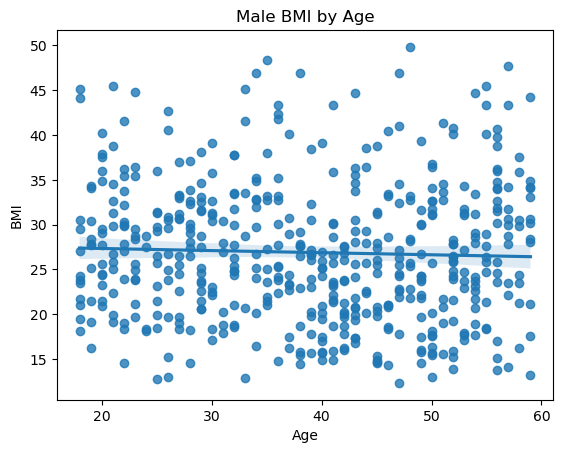

In [75]:
bmi_df = male_df[['Age', 'BMI']].groupby(by=['Age']).mean().reset_index()
sns.regplot(x='Age', y='BMI', data=male_df)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Male BMI by Age")
plt.show()

Based on the graph, it does not seem to be any strong trends in BMI as an individual gets older. We can check the female trend to see if it's any different from the male trend.

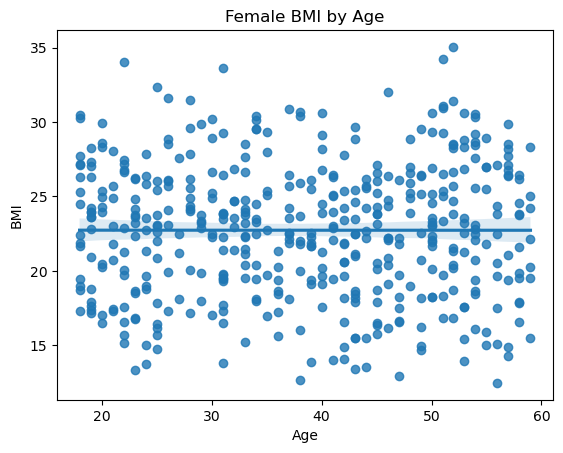

In [76]:
bmi_df = female_df[['Age', 'BMI']].groupby(by=['Age']).mean().reset_index()
sns.regplot(x='Age', y='BMI', data=female_df)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Female BMI by Age")
plt.show()

By the graph, there is a weaker trend compared to the male graph.